# Data Merge

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [117]:
os.environ["CUDA_VISIBLE_DEVICES"]='1'

### Data Path Setting

In [118]:
# csv = '/home/master/Jibum/Motion_Show/HAR/DataSet/'

# csv_ls = os.listdir(csv)

In [119]:
# DataSet = pd.DataFrame()

# for i in csv_ls:
#     df = pd.read_csv(csv + '/' + i)
#     DataSet = pd.concat([DataSet, df])

In [120]:
# DataSet.to_csv('/home/master/Jibum/Motion_Show/HAR/Dataset.csv')

In [121]:
DataSet = pd.read_csv('/home/master/Jibum/Motion_Show/HAR/Dataset.csv')
DataSet = DataSet.drop('Unnamed: 0', axis=1)

In [122]:
DataSet

,accelerometer_right_foot_x,accelerometer_right_foot_y,accelerometer_right_foot_z,gyroscope_right_foot_x,gyroscope_right_foot_y,gyroscope_right_foot_z,accelerometer_right_shin_x,accelerometer_right_shin_y,accelerometer_right_shin_z,gyroscope_right_shin_x,...,gyroscope_left_shin_z,accelerometer_left_thigh_x,accelerometer_left_thigh_y,accelerometer_left_thigh_z,gyroscope_left_thigh_x,gyroscope_left_thigh_y,gyroscope_left_thigh_z,EMG_right,EMG_left,activity
0,-9256,-3132,13492,125,-72,-128,-15056,744,-5952,-16,...,128,-2912,3828,16356,215,-18,39,127,127,sitting
1,-9256,-3104,13584,144,-77,-156,-15084,820,-6076,-2,...,118,-2896,3900,16464,217,-27,45,127,127,sitting
2,-9212,-3112,13576,157,-48,-157,-15112,696,-5992,-26,...,119,-2924,3912,16448,165,10,27,127,127,sitting
3,-9216,-3084,13572,129,-55,-110,-15120,796,-6036,5,...,148,-2904,4012,16540,159,-26,48,127,127,sitting
4,-9192,-3100,13596,119,-23,-151,-15084,740,-6176,-22,...,94,-2912,3924,16380,163,-31,66,127,127,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137274,-8864,-3604,12976,-120,168,-117,-15992,2100,-4912,86,...,-265,-16112,2828,-2076,-544,274,-1,124,117,standing
1137275,-8944,-3496,12900,-109,185,-132,-15856,2128,-4796,-14,...,-293,-16280,2296,-1672,-1091,229,39,126,129,standing
1137276,-8784,-3516,12920,-100,195,-173,-15644,1988,-4648,78,...,-238,-16296,2052,-972,-1464,115,106,122,132,standing
1137277,-8852,-3552,12824,-83,125,-151,-15712,1764,-4444,251,...,-145,-16224,1820,-1100,-998,1,197,127,123,standing


In [8]:
motion = DataSet[['activity']]

In [9]:
DataSet = DataSet.drop(['EMG_right','EMG_left','activity'], axis=1)

In [10]:
col = DataSet.columns

In [11]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# DataSet = scaler.fit_transform(DataSet[:])

In [12]:
from sklearn.preprocessing import Normalizer
nor = Normalizer()
DataSet = nor.fit_transform(DataSet)

In [13]:
DataSet = pd.DataFrame(DataSet)

In [14]:
DataSet.columns = col

In [15]:
DataSet

,accelerometer_right_foot_x,accelerometer_right_foot_y,accelerometer_right_foot_z,gyroscope_right_foot_x,gyroscope_right_foot_y,gyroscope_right_foot_z,accelerometer_right_shin_x,accelerometer_right_shin_y,accelerometer_right_shin_z,gyroscope_right_shin_x,...,accelerometer_left_shin_z,gyroscope_left_shin_x,gyroscope_left_shin_y,gyroscope_left_shin_z,accelerometer_left_thigh_x,accelerometer_left_thigh_y,accelerometer_left_thigh_z,gyroscope_left_thigh_x,gyroscope_left_thigh_y,gyroscope_left_thigh_z
0,-0.227916,-0.077121,0.332222,0.003078,-0.001773,-0.003152,-0.370733,0.018320,-0.146560,-0.000394,...,-0.157690,0.002339,-0.000640,0.003152,-0.071704,0.094259,0.402744,0.005294,-0.000443,0.000960
1,-0.227589,-0.076322,0.334006,0.003541,-0.001893,-0.003836,-0.370889,0.020162,-0.149398,-0.000049,...,-0.155496,0.002778,-0.000492,0.002901,-0.071207,0.095894,0.404820,0.005336,-0.000664,0.001106
2,-0.226692,-0.076581,0.334082,0.003864,-0.001181,-0.003864,-0.371880,0.017127,-0.147453,-0.000640,...,-0.156312,0.002510,-0.000443,0.002928,-0.071955,0.096268,0.404757,0.004060,0.000246,0.000664
3,-0.226211,-0.075698,0.333131,0.003166,-0.001350,-0.002700,-0.371128,0.019538,-0.148157,0.000123,...,-0.156797,0.001915,0.000491,0.003633,-0.071280,0.098476,0.405982,0.003903,-0.000638,0.001178
4,-0.225819,-0.076157,0.334011,0.002923,-0.000565,-0.003710,-0.370567,0.018179,-0.151725,-0.000540,...,-0.156540,0.002162,-0.000614,0.002309,-0.071539,0.096400,0.402405,0.004004,-0.000762,0.001621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137274,-0.218885,-0.088996,0.320426,-0.002963,0.004149,-0.002889,-0.394902,0.051857,-0.121295,0.002124,...,-0.083168,0.001580,-0.015088,-0.006544,-0.397865,0.069834,-0.051264,-0.013433,0.006766,-0.000025
1137275,-0.221846,-0.086714,0.319970,-0.002704,0.004589,-0.003274,-0.393291,0.052783,-0.118960,-0.000347,...,-0.070642,-0.006995,-0.013568,-0.007268,-0.403808,0.056950,-0.041472,-0.027061,0.005680,0.000967
1137276,-0.219388,-0.087815,0.322688,-0.002498,0.004870,-0.004321,-0.390722,0.049652,-0.116088,0.001948,...,-0.063139,-0.011189,-0.010115,-0.005944,-0.407006,0.051250,-0.024277,-0.036565,0.002872,0.002647
1137277,-0.221539,-0.088896,0.320946,-0.002077,0.003128,-0.003779,-0.393223,0.044148,-0.111220,0.006282,...,-0.067272,-0.008860,-0.007883,-0.003629,-0.406037,0.045549,-0.027530,-0.024977,0.000025,0.004930


### Target Count

In [16]:
motion.value_counts()

activity        
walking             314966
standing            222345
going_up            135127
going_down          119819
up_by_elevator       89144
sitting              82574
down_by_elevator     68762
running              65917
standing_up          20506
sitting_down         18119
dtype: int64

### Data Columns

In [17]:
DataSet.columns

Index(['accelerometer_right_foot_x', 'accelerometer_right_foot_y',
       'accelerometer_right_foot_z', 'gyroscope_right_foot_x',
       'gyroscope_right_foot_y', 'gyroscope_right_foot_z',
       'accelerometer_right_shin_x', 'accelerometer_right_shin_y',
       'accelerometer_right_shin_z', 'gyroscope_right_shin_x',
       'gyroscope_right_shin_y', 'gyroscope_right_shin_z',
       'accelerometer_right_thigh_x', 'accelerometer_right_thigh_y',
       'accelerometer_right_thigh_z', 'gyroscope_right_thigh_x',
       'gyroscope_right_thigh_y', 'gyroscope_right_thigh_z',
       'accelerometer_left_foot_x', 'accelerometer_left_foot_y',
       'accelerometer_left_foot_z', 'gyroscope_left_foot_x',
       'gyroscope_left_foot_y', 'gyroscope_left_foot_z',
       'accelerometer_left_shin_x', 'accelerometer_left_shin_y',
       'accelerometer_left_shin_z', 'gyroscope_left_shin_x',
       'gyroscope_left_shin_y', 'gyroscope_left_shin_z',
       'accelerometer_left_thigh_x', 'accelerometer_left_thig

### Acc / Gyro / Acc+Gyro

In [18]:
Acc = DataSet[['accelerometer_right_foot_x', 'accelerometer_right_foot_y','accelerometer_right_foot_z',
               'accelerometer_right_shin_x', 'accelerometer_right_shin_y','accelerometer_right_shin_z',
               'accelerometer_right_thigh_x', 'accelerometer_right_thigh_y','accelerometer_right_thigh_z',
               'accelerometer_left_foot_x', 'accelerometer_left_foot_y','accelerometer_left_foot_z',
               'accelerometer_left_shin_x', 'accelerometer_left_shin_y','accelerometer_left_shin_z',
               'accelerometer_left_thigh_x', 'accelerometer_left_thigh_y','accelerometer_left_thigh_z']]

Gyro = DataSet[['gyroscope_right_foot_x', 'gyroscope_right_foot_y','gyroscope_right_foot_z',
               'gyroscope_right_shin_x', 'gyroscope_right_shin_y','gyroscope_right_shin_z',
               'gyroscope_right_thigh_x', 'gyroscope_right_thigh_y','gyroscope_right_thigh_z',
               'gyroscope_left_foot_x', 'gyroscope_left_foot_y','gyroscope_left_foot_z',
               'gyroscope_left_shin_x', 'gyroscope_left_shin_y','gyroscope_left_shin_z',
               'gyroscope_left_thigh_x', 'gyroscope_left_thigh_y','gyroscope_left_thigh_z']]

AccGyro = DataSet

### PCA

In [19]:
# PCA
accRF = DataSet[['accelerometer_right_foot_x','accelerometer_right_foot_y','accelerometer_right_foot_z']].values
accRS = DataSet[['accelerometer_right_shin_x','accelerometer_right_shin_y','accelerometer_right_shin_z']].values
accRT = DataSet[['accelerometer_right_thigh_x','accelerometer_right_thigh_y','accelerometer_right_thigh_z']].values
accLF = DataSet[['accelerometer_left_foot_x','accelerometer_left_foot_y','accelerometer_left_foot_z']].values
accLS = DataSet[['accelerometer_left_shin_x','accelerometer_left_shin_y','accelerometer_left_shin_z']].values
accLT = DataSet[['accelerometer_left_thigh_x','accelerometer_left_thigh_y','accelerometer_left_thigh_z']].values

In [20]:
gyroRF = DataSet[['gyroscope_right_foot_x', 'gyroscope_right_foot_y', 'gyroscope_right_foot_z']].values
gyroRS = DataSet[['gyroscope_right_shin_x', 'gyroscope_right_shin_y', 'gyroscope_right_shin_z']].values
gyroRT = DataSet[['gyroscope_right_thigh_x', 'gyroscope_right_thigh_y', 'gyroscope_right_thigh_z']].values
gyroLF = DataSet[['gyroscope_left_foot_x', 'gyroscope_left_foot_y', 'gyroscope_left_foot_z']].values
gyroLS = DataSet[['gyroscope_left_shin_x', 'gyroscope_left_shin_y', 'gyroscope_left_shin_z']].values
gyroLT = DataSet[['gyroscope_left_thigh_x', 'gyroscope_left_thigh_y', 'gyroscope_left_thigh_z']].values

In [21]:
from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA

accrf = SS().fit_transform(accRF)
accrs = SS().fit_transform(accRS)
accrt = SS().fit_transform(accRT)
acclf = SS().fit_transform(accLF)
accls = SS().fit_transform(accLS)
acclt = SS().fit_transform(accLT)

gyrorf = SS().fit_transform(gyroRF)
gyrors = SS().fit_transform(gyroRS)
gyrort = SS().fit_transform(gyroRT)
gyrolf = SS().fit_transform(gyroLF)
gyrols = SS().fit_transform(gyroLS)
gyrolt = SS().fit_transform(gyroLT)

pca = PCA(n_components=1)

accrf = pca.fit_transform(accrf)
accrfDF = pd.DataFrame(data = accrf, columns=['Acc_Right_Foot'])
accrs = pca.fit_transform(accrs)
accrsDF = pd.DataFrame(data = accrs, columns=['Acc_Right_Shin'])
accrt = pca.fit_transform(accrt)
accrtDF = pd.DataFrame(data = accrt, columns=['Acc_Right_thigh'])
acclf = pca.fit_transform(acclf)
acclfDF = pd.DataFrame(data = acclf, columns=['Acc_Left_Foot'])
accls = pca.fit_transform(accls)
acclsDF = pd.DataFrame(data = accls, columns=['Acc_Left_Shin'])
acclt = pca.fit_transform(acclt)
accltDF = pd.DataFrame(data = acclt, columns=['Acc_Left_thigh'])

gyrorf = pca.fit_transform(gyrorf)
gyrorfDF = pd.DataFrame(data = gyrorf, columns=['Gyro_Right_Foot'])
gyrors = pca.fit_transform(gyrors)
gyrorsDF = pd.DataFrame(data = gyrors, columns=['Gyro_Right_Shin'])
gyrort = pca.fit_transform(gyrort)
gyrortDF = pd.DataFrame(data = gyrort, columns=['Gyro_Right_thigh'])
gyrolf = pca.fit_transform(gyrolf)
gyrolfDF = pd.DataFrame(data = gyrolf, columns=['Gyro_Left_Foot'])
gyrols = pca.fit_transform(gyrols)
gyrolsDF = pd.DataFrame(data = gyrols, columns=['Gyro_Left_Shin'])
gyrolt = pca.fit_transform(gyrolt)
gyroltDF = pd.DataFrame(data = gyrolt, columns=['Gyro_Left_thigh'])


### PCA_Acc / PCA_Gyro / PCA_Acc_Gyro

In [22]:
Pca_Acc = pd.concat([accrfDF,accrsDF,accrtDF,acclfDF,acclsDF,accltDF], axis=1)
Pca_Gyro = pd.concat([gyrorfDF,gyrorsDF,gyrortDF,gyrolfDF,gyrolsDF,gyroltDF], axis=1)
Pca_Acc_Gyro = pd.concat([accrfDF,accrsDF,accrtDF,acclfDF,acclsDF,accltDF,gyrorfDF,gyrorsDF,gyrortDF,gyrolfDF,gyrolsDF,gyroltDF], axis=1)

# Training Data

In [23]:
print(Acc.shape)
print(Gyro.shape)
print(AccGyro.shape)
print(Pca_Acc.shape)
print(Pca_Gyro.shape)
print(Pca_Acc_Gyro.shape)

(1137279, 18)
(1137279, 18)
(1137279, 36)
(1137279, 6)
(1137279, 6)
(1137279, 12)


# Exponential Smoothing

In [24]:
# pip install --upgrade --no-deps statsmodels

In [25]:
# pip install patsy

In [26]:
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# EMGR = DataSet['EMG_right'].values
# act = DataSet['activity'].values

# data = EMGR
# index = act
# test = pd.Series(data,index)

# ax = test.plot()
# ax.set_xlabel('motion')
# ax.set_ylabel('EMG_right')
# print("Figure : EMG value in motion")

In [27]:
# fit1 = SimpleExpSmoothing(test, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
# fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')

# fit2 = SimpleExpSmoothing(test, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
# fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')

# fit3 = SimpleExpSmoothing(test, initialization_method="estimated").fit()
# fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

# plt.figure(figsize=(15, 10))
# plt.plot(test, marker='o', color='black')
# plt.plot(fit1.fittedvalues, marker='o', color='blue')

# line1, = plt.plot(fcast1, marker='o', color='blue')
# plt.plot(fit2.fittedvalues, marker='o', color='red')

# line2, = plt.plot(fcast2, marker='o', color='red')
# plt.plot(fit3.fittedvalues, marker='o', color='green')

# line3, = plt.plot(fcast3, marker='o', color='green')
# plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [28]:
# data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
# index= pd.date_range(start='1996', end='2008', freq='A')
# oildata = pd.Series(data, index)

# data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
# index= pd.date_range(start='1990', end='2005', freq='A')
# air = pd.Series(data, index)

# data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
# index= pd.date_range(start='1970', end='2001', freq='A')
# livestock2 = pd.Series(data, index)

# data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
# index= pd.date_range(start='2001', end='2008', freq='A')
# livestock3 = pd.Series(data, index)

# data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
# index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
# aust = pd.Series(data, index)

In [29]:
# ax=oildata.plot()
# ax.set_xlabel("Year")
# ax.set_ylabel("Oil (millions of tonnes)")
# print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

In [30]:
# fit1 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
# fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
# fit2 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
# fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
# fit3 = SimpleExpSmoothing(oildata, initialization_method="estimated").fit()
# fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

# plt.figure(figsize=(12, 8))
# plt.plot(oildata, marker='o', color='black')
# plt.plot(fit1.fittedvalues, marker='o', color='blue')
# line1, = plt.plot(fcast1, marker='o', color='blue')
# plt.plot(fit2.fittedvalues, marker='o', color='red')
# line2, = plt.plot(fcast2, marker='o', color='red')
# plt.plot(fit3.fittedvalues, marker='o', color='green')
# line3, = plt.plot(fcast3, marker='o', color='green')
# plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

### Data Shape

In [31]:
print(Acc.shape)
print(Gyro.shape)
print(AccGyro.shape)
print(Pca_Acc.shape)
print(Pca_Gyro.shape)
print(Pca_Acc_Gyro.shape)

(1137279, 18)
(1137279, 18)
(1137279, 36)
(1137279, 6)
(1137279, 6)
(1137279, 12)


## One-Hot Encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(motion)
motion_onehot = enc.transform(motion).toarray()

## Train,Test Split

In [33]:
# x_train_all, x_test, y_train_all,y_test = train_test_split(AccGyro, motion_onehot, stratify=motion, test_size=0.2, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [34]:
pcax_train_all, pcax_test, pcay_train_all, pcay_test = train_test_split(Pca_Acc_Gyro, motion_onehot, stratify=motion, test_size=0.2, random_state=42)
pcax_train, pcax_val, pcay_train, pcay_val = train_test_split(pcax_train_all, pcay_train_all, stratify=pcay_train_all, test_size=0.2, random_state=42)

In [35]:
# print(x_train_all.shape)
# print(y_train_all.shape)
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
# print(x_val.shape)
# print(y_val.shape)
print()
print(pcax_train_all.shape)
print(pcay_train_all.shape)
print(pcax_train.shape)
print(pcay_train.shape)
print(pcax_test.shape)
print(pcay_test.shape)
print(pcax_val.shape)
print(pcay_val.shape)



(909823, 12)
(909823, 10)
(727858, 12)
(727858, 10)
(227456, 12)
(227456, 10)
(181965, 12)
(181965, 10)


# Model create (MLP)

In [36]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Activation
# import tensorflow as tf

# model = Sequential()
# model.add(Dense(1000, input_shape=(36, )))
# model.add(Activation('sigmoid'))
# model.add(Dense(600))
# model.add(Activation('relu'))
# model.add(Dense(180))
# model.add(Activation('relu'))
# model.add(Dense(10))
# model.add(Activation('softmax'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary()

# tf.keras.utils.plot_model(model,to_file="/home/master/Jibum/Motion_Show/HAR/MLP.png",
#     show_shapes=True,
#     show_dtype=True,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96,
# )


In [37]:
# history = model.fit(x_train,y_train, epochs=30, validation_data = (x_val,y_val))

In [38]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

# plt.xlabel('epoch')
# plt.ylabel('loss')

In [39]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.xlabel('epoch')
# plt.ylabel('accuracy')RF_pred

In [40]:
# result = model.evaluate(x_test,y_test)

# print(model.metrics_names)
# print(result)
# print("loss :", result[0])
# print("Accuray :", result[1])

In [109]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf

model = Sequential()
model.add(Dense(456, input_shape=(12, )))
model.add(Activation('tanh'))
model.add(Dense(128))
model.add(Activation('swish'))
# model.add(Dense(180))
# model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

tf.keras.utils.plot_model(model,to_file="/home/master/Jibum/Motion_Show/HAR/MLP.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

pcahistory = model.fit(pcax_train, pcay_train, epochs=30, validation_data = (pcax_val, pcay_val))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 456)               5928      
_________________________________________________________________
activation_14 (Activation)   (None, 456)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               58496     
_________________________________________________________________
activation_15 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total params: 65,714
Trainable params: 65,714
Non-trainable params: 0
__________________________________________________

Text(0, 0.5, 'loss')

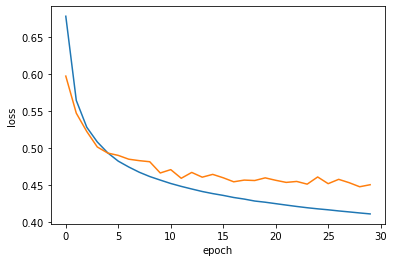

In [110]:
plt.plot(pcahistory.history['loss'])
plt.plot(pcahistory.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

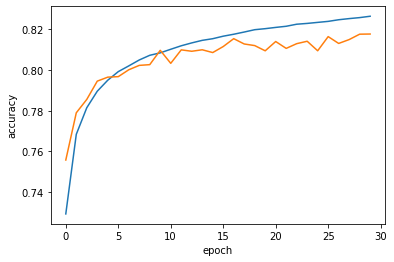

In [111]:
plt.plot(pcahistory.history['accuracy'])
plt.plot(pcahistory.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [112]:
result = model.evaluate(pcax_test,pcay_test)

print(model.metrics_names)
print(result)
print("loss :", result[0])
print("Accuray :", result[1])

7108/7108 [==============================] - 9s 1ms/step - loss: 0.4500 - accuracy: 0.8172
['loss', 'accuracy']
[0.4500114619731903, 0.8172394037246704]
loss : 0.4500114619731903
Accuray : 0.8172394037246704


In [94]:
pred = model.predict(pcax_test)
print(pred)

[[4.0448092e-28 9.9567884e-01 1.0165519e-06 ... 8.5685485e-35
  0.0000000e+00 8.3377969e-04]
 [3.3463866e-24 3.5890896e-08 1.3113566e-09 ... 3.8730561e-19
  1.3364531e-24 6.1508985e-09]
 [3.0500862e-16 2.7902141e-11 6.8858732e-13 ... 3.4526424e-03
  2.2010364e-33 1.2300651e-10]
 ...
 [1.1361452e-30 9.0250093e-04 9.9809581e-01 ... 4.9208979e-32
  8.5222790e-20 9.8436244e-04]
 [3.9470752e-20 2.2330303e-03 7.0147067e-03 ... 3.5961505e-12
  3.3905742e-16 9.8596132e-01]
 [2.6006967e-19 6.8595364e-05 9.9614067e-03 ... 2.3151650e-26
  3.0421182e-15 9.8996979e-01]]


In [95]:
pred.shape

(227456, 10)

In [97]:
pred_label = np.argmax(pred, axis=1)
print(pred_label)

[1 3 4 ... 2 9 9]


In [99]:
pred_label[:9]

array([1, 3, 4, 9, 6, 9, 2, 9, 9])

In [100]:
pcay_test[:9]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [80]:
sensor = pd.read_csv('/home/master/Jibum/Motion_Show/HAR/test.csv')

In [81]:
print(sensor.columns)

Index(['02-X-x', '02-X-y', '02-X-z', '02-A-x', '02-A-y', '02-A-z', '03-X-x',
       '03-X-y', '03-X-z', '03-A-x', '03-A-y', '03-A-z', '04-X-x', '04-X-y',
       '04-X-z', '04-A-x', '04-A-y', '04-A-z', '05-X-x', '05-X-y', '05-X-z',
       '05-A-x', '05-A-y', '05-A-z', '06-X-x', '06-X-y', '06-X-z', '06-A-x',
       '06-A-y', '06-A-z', '07-X-x', '07-X-y', '07-X-z', '07-A-x', '07-A-y',
       '07-A-z'],
      dtype='object')


In [82]:
ART = sensor[['02-A-x', '02-A-y', '02-A-z']].values
ARS = sensor[['03-A-x', '03-A-y', '03-A-z']].values
ARF = sensor[['04-A-x', '04-A-y', '04-A-z']].values
GRT = sensor[['02-X-x', '02-X-y', '02-X-z']].values
GRS = sensor[['03-X-x', '03-X-y', '03-X-z']].values
GRF = sensor[['04-X-x', '04-X-y', '04-X-z']].values
ALT = sensor[['05-A-x', '05-A-y', '05-A-z']].values
ALS = sensor[['06-A-x', '06-A-y', '06-A-z']].values
ALF = sensor[['07-A-x', '07-A-y', '07-A-z']].values
GLT = sensor[['05-X-x', '05-X-y', '05-X-z']].values
GLS = sensor[['06-X-x', '06-X-y', '06-X-z']].values
GLF = sensor[['07-X-x', '07-X-y', '07-X-z']].values

In [84]:
# ART = SS(ART).fit_transform(ART)
# ARS = SS(ARS).fit_transform(ARS)
# ARF = SS(ARF).fit_transform(ARF)
# GRT = SS(GRT).fit_transform(GRT)
# GRS = SS(GRS).fit_transform(GRS)
# GRF = SS(GRF).fit_transform(GRF)
# ALT = SS(ALT).fit_transform(ALT)
# ALS = SS(ALS).fit_transform(ALS)
# ALF = SS(ALF).fit_transform(ALF)
# GLT = SS(GLT).fit_transform(GLT)
# GLS = SS(GLS).fit_transform(GLS)
# GLF = SS(GLF).fit_transform(GLF)

ART = pca.fit_transform(ART)
ARTDF = pd.DataFrame(data = ART, columns=['Acc_Right_thigh'])
ARS = pca.fit_transform(ARS)
ARSDF = pd.DataFrame(data = ARS, columns=['Acc_Right_Shin'])
ARF = pca.fit_transform(ARF)
ARFDF = pd.DataFrame(data = ARF, columns=['Acc_Right_Foot'])
ALF = pca.fit_transform(ALF)
ALFDF = pd.DataFrame(data = ALF, columns=['Acc_Left_Foot'])
ALS = pca.fit_transform(ALS)
ALSDF = pd.DataFrame(data = ALS, columns=['Acc_Left_Shin'])
ALT = pca.fit_transform(ALT)
ALTDF = pd.DataFrame(data = ALT, columns=['Acc_Left_thigh'])

GRF = pca.fit_transform(GRF)
GRFDF = pd.DataFrame(data = GRF, columns=['Gyro_Right_Foot'])
GRS = pca.fit_transform(GRS)
GRSDF = pd.DataFrame(data = GRS, columns=['Gyro_Right_Shin'])
GRT = pca.fit_transform(GRT)
GRTDF = pd.DataFrame(data = GRT, columns=['Gyro_Right_thigh'])
GLF = pca.fit_transform(GLF)
GLFDF = pd.DataFrame(data = GLF, columns=['Gyro_Left_Foot'])
GLS = pca.fit_transform(GLS)
GLSDF = pd.DataFrame(data = GLS, columns=['Gyro_Left_Shin'])
GLT = pca.fit_transform(GLT)
GLTDF = pd.DataFrame(data = GLT, columns=['Gyro_Left_thigh'])


In [85]:
sensor = pd.concat([ARFDF,ARSDF,ARTDF,ALFDF,ALSDF,ALTDF,GRFDF,GRSDF,GRTDF,GLFDF,GLSDF,GLTDF], axis=1)

In [86]:
sensor

,Acc_Right_Foot,Acc_Right_Shin,Acc_Right_thigh,Acc_Left_Foot,Acc_Left_Shin,Acc_Left_thigh,Gyro_Right_Foot,Gyro_Right_Shin,Gyro_Right_thigh,Gyro_Left_Foot,Gyro_Left_Shin,Gyro_Left_thigh
0,-0.291061,0.159742,-0.070874,-0.243495,0.133831,-0.124988,-3.525321,3.555818,3.548342,3.554798,3.577376,3.560380
1,-0.291061,0.159742,-0.070874,-0.243495,0.133831,-0.124988,-3.525321,3.555828,3.548342,3.554798,3.577376,3.560380
2,-0.291481,0.162929,-0.072313,-0.245175,0.133831,-0.135649,-3.525321,3.555917,3.548441,3.554798,3.577376,3.560380
3,-0.291481,0.162929,-0.075004,-0.241383,0.133831,-0.138925,-3.525321,3.555927,3.548441,3.554798,3.577376,3.560380
4,-0.291061,0.158276,-0.072845,-0.236669,0.135258,-0.142771,-3.525421,3.555927,3.548451,3.554798,3.577376,3.560480
...,...,...,...,...,...,...,...,...,...,...,...,...
1153,-0.267960,0.139411,-0.062161,-0.217487,0.178018,-0.055655,3.543952,-3.517864,-3.505830,-3.546607,-3.499717,-3.483602
1154,-0.269105,0.144079,-0.043992,-0.221280,0.178018,-0.056519,3.543952,-3.517774,-3.505740,-3.546507,-3.499827,-3.483821
1155,-0.269105,0.144318,-0.032900,-0.217348,0.178018,-0.057662,3.543962,-3.517784,-3.505761,-3.546507,-3.499937,-3.483931
1156,-0.270670,0.150660,-0.031764,-0.217487,0.164830,-0.061231,3.543962,-3.517795,-3.505771,-3.546507,-3.499958,-3.483942


In [88]:
pred = model.predict(sensor)
print(pred)

[[1.86738010e-31 2.35925719e-01 2.68411888e-08 ... 2.64796863e-35
  7.68846168e-38 7.64074266e-01]
 [1.86712772e-31 2.35918134e-01 2.68396096e-08 ... 2.64789372e-35
  7.68765678e-38 7.64081776e-01]
 [2.19066185e-31 2.46519879e-01 2.76764087e-08 ... 2.65156571e-35
  7.69690815e-38 7.53480136e-01]
 ...
 [4.26318361e-30 4.31041187e-03 7.71223867e-08 ... 7.74302233e-36
  2.76504258e-37 9.94412124e-01]
 [6.12696657e-30 4.25508246e-03 8.02057016e-08 ... 1.02415455e-35
  3.14440255e-37 9.94500518e-01]
 [5.43479488e-30 4.24762629e-03 7.89552175e-08 ... 8.49723712e-36
  2.57121497e-37 9.94586706e-01]]


In [89]:
pred.shape

(1158, 10)

In [91]:
pred_label = np.argmax(pred, axis=1)
print(pred_label)

[9 9 9 ... 9 9 9]


In [92]:
pred_label[0:9]

array([9, 9, 9, 9, 9, 9, 9, 9, 9])

In [93]:
motion[:9]

,activity
0,sitting
1,sitting
2,sitting
3,sitting
4,sitting
5,sitting
6,sitting
7,sitting
8,sitting


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators = 10, min_samples_split = 20, min_samples_leaf = 25)
clf.fit(pcax_train, pcay_train)

RF_pred = clf.predict(pcax_test)
print(RF_pred)

print("acc : ", metrics.accuracy_score(pcay_test, RF_pred))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
acc :  0.724979776308385


In [113]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(pcax_train, pcay_train)
tr_pred = tree.predict(pcax_test)
(tr_pred == pcay_test).mean()

0.9545520891952729